In [1]:
# IMPORTS
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('default')  # <-- for Jupyter: white figures background
from pyinstrument import Profiler
if not any("_general_fcts" in s for s in sys.path):
    sys.path.append('C:/Users/pdidier/Dropbox/PC/Documents/sounds-phd/01_algorithms/01_NR/02_distributed')
import danse_utilities.danse_subfcns as fcns

In [6]:
N = 1024
R = N // 2
seed = 12345
rng = np.random.default_rng(seed)
wTD = 2 * rng.random(N) - 1
wTD = wTD[:, np.newaxis]
wHat = np.fft.fft(wTD, N, axis=0)
wHat = wHat[:int(len(wHat) // 2 + 1)]
win = np.sqrt(np.hanning(N))

y = rng.random((N, 1))

test = fcns.dist_fct_approx(wHat, win, win, R)

profiler = Profiler()
profiler.start()
# a = fcns.get_desired_signal(wHat, 0, win, 0, 0, R, R, processingType='conv', yTD=y)
a = fcns.dist_fct_approx(wHat, win, win, R, jitted=True)
profiler.stop()
profiler.print(show_all=True, timeline=True)


  _     ._   __/__   _ _  _  _ _/_   Recorded: 13:41:13  Samples:  13
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.047     CPU time: 0.422
/   _/                      v4.1.1

Program: c:\Users\pdidier\Anaconda3\envs\danse_env_conda\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9008 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"dad42003-4fef-4386-825d-62c19f4dfa59" --shell=9007 --transport="tcp" --iopub=9009 --f=c:\Users\pdidier\AppData\Roaming\jupyter\runtime\kernel-v2-32216Ff2b8DsEFg4g.json

0.046 run_code  IPython\core\interactiveshell.py:3416
└─ 0.046 <module>  ..\AppData\Local\Temp\ipykernel_20428\3375383427.py:18
   ├─ 0.044 dist_fct_approx  danse_utilities\danse_subfcns.py:1431
   │  ├─ 0.002 circulant  scipy\linalg\special_matrices.py:202
   │  │  └─ 0.002 ndarray.copy  <built-in>:0
   │  ├─ 0.017 [self]  
   │  ├─ 0.001 diag  <__array_function__ internals>:2
   │  │  └─ 0.001 diag  numpy\lib\twodim_base.py:229
   │  ├─ 0

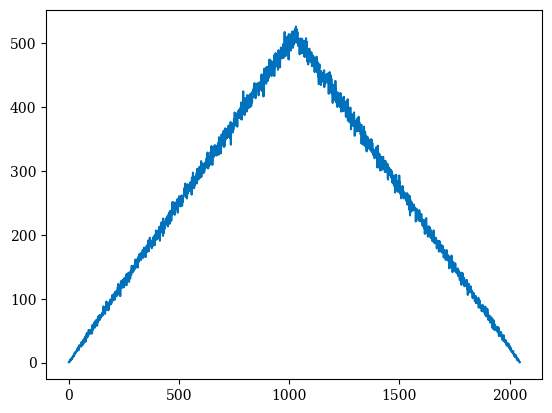

In [3]:
n = N
Amat = rng.random((N, N))
wIR_out = np.zeros(2 * n - 1)
wIR_out2 = np.zeros(2 * n - 1)
for ii in np.arange(start=-n+1, stop=n):
    wIR_out[ii + n - 1] = np.sum(np.diagonal(Amat, ii))
    wIR_out2[ii + n - 1] = np.trace(Amat, ii)


plt.plot(wIR_out)
# plt.plot(wIR_out2)

In [4]:

from numba import njit

@njit
def testfunc(A):
    B = np.trace(A)
    return B

testfunc(rng.random((R, R)))

253.1609983109821